In [11]:
from datasets import load_dataset


dataset = load_dataset("bigscience/P3", "adversarial_qa_dbert_answer_the_following_q", split="train[:10%]")
print("done")


done


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24

In [10]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [12]:
def token_count(text):
    return len(re.findall(r'\w+', text))


In [13]:
import re
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to count tokens in text



In [14]:
def token_count(text):
    return len(re.findall(r'\w+', text))



In [15]:
# Filter out samples with less than 100 tokens
filtered_dataset = dataset.filter(lambda x: token_count(x['inputs_pretokenized']) >= 100)
filtered_texts = filtered_dataset['inputs_pretokenized']

# Load the pre-trained SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')



Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
# Function to get SBERT embeddings for a list of texts in batches
def get_sbert_embeddings(texts, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        embeddings = model.encode(batch_texts, show_progress_bar=True)
        all_embeddings.append(embeddings)
    return np.vstack(all_embeddings)



In [17]:
# Generate SBERT embeddings
print("Generating SBERT embeddings...")
embeddings = get_sbert_embeddings(filtered_texts)



Generating SBERT embeddings...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# Data deduplication using cosine similarity (threshold > 0.95)
similarity_threshold = 0.95
cosine_similarities = cosine_similarity(embeddings)

# Find duplicate groups based on cosine similarity
to_remove = set()
for i in range(len(filtered_texts)):
    for j in range(i + 1, len(filtered_texts)):
        if cosine_similarities[i, j] > similarity_threshold:
            to_remove.add(j)

# Remove duplicates
deduplicated_texts = [filtered_texts[i] for i in range(len(filtered_texts)) if i not in to_remove]
deduplicated_dataset = filtered_dataset.filter(lambda x: x['inputs_pretokenized'] in deduplicated_texts)

Filter:   0%|          | 0/894 [00:00<?, ? examples/s]

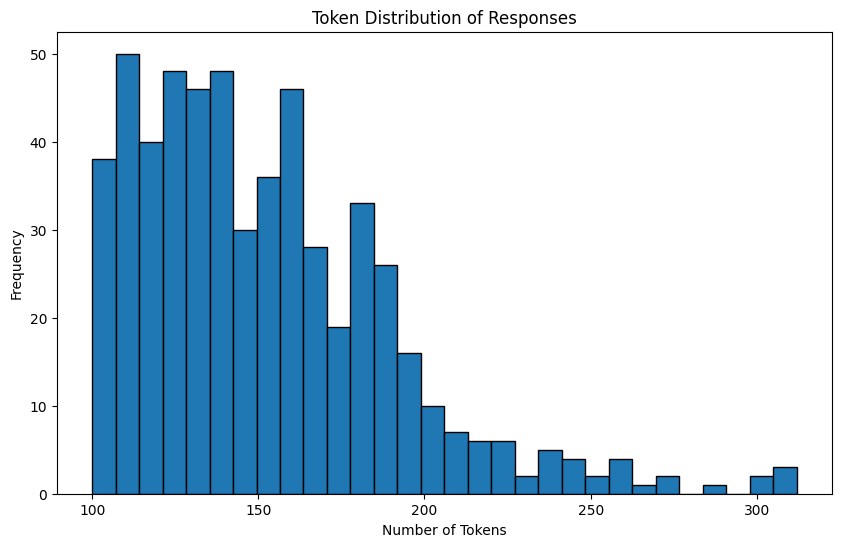

In [19]:
import matplotlib.pyplot as plt

token_counts = [token_count(response) for response in deduplicated_texts]

plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=30, edgecolor='black')
plt.title('Token Distribution of Responses')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


In [20]:
deduplicated_dataset.save_to_disk("path/to/save/directory")

Saving the dataset (0/1 shards):   0%|          | 0/559 [00:00<?, ? examples/s]

In [ ]:
from google.colab import drive
save_path = '/content/drive/My Drive/datasets/deduplicated_dataset'
deduplicated_dataset.save_to_disk(save_path)

Saving the dataset (0/1 shards):   0%|          | 0/559 [00:00<?, ? examples/s]

In [ ]:
!pip install wandb
import wandb
from transformers import Trainer, TrainingArguments, AutoModelForCausalLM, AutoTokenizer





In [ ]:
# Initialize Weights and Biases
wandb.init(project="mistral_finetune")



CommError: Run initialization has timed out after 90.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

In [ ]:
from datasets import Dataset, load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
import os

In [ ]:
# Path to your local dataset folder
dataset_folder = "/content/path/to/save/directory"

In [ ]:
from datasets import load_dataset

# Define the path to your dataset file
dataset_file = '/content/path/to/save/directory/data-00000-of-00001.arrow'

# Load the dataset using the arrow format
dataset = load_dataset('arrow', data_files={"train": dataset_file})

# Accessing the loaded dataset
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['inputs', 'inputs_pretokenized', 'targets', 'targets_pretokenized'],
        num_rows: 559
    })
})


In [ ]:
train_dataset = dataset['train']

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.add_special_tokens({'pad_token': '[PAD]'})  # Define a padding token

model = GPT2LMHeadModel.from_pretrained("gpt2")

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["inputs_pretokenized"], padding="max_length", truncation=True)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/559 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments

In [ ]:
!pip show accelerate transformers


Name: accelerate
Version: 0.32.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 
---
Name: transformers
Version: 4.41.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: sentence-transformers


In [ ]:
pip install transformers[torch]

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset

# Load your dataset
dataset_file = '/content/path/to/save/directory/data-00000-of-00001.arrow'
dataset = load_dataset('arrow', data_files={"train": dataset_file})
train_dataset = dataset['train']

# Tokenizer initialization
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.add_special_tokens({'pad_token': '[PAD]'})  # Define a padding token

# Function to tokenize inputs and apply dynamic padding
def tokenize_function(examples):
    inputs = examples['inputs_pretokenized']
    tokenized_inputs = tokenizer(inputs, padding="max_length", truncation=True, max_length=512)
    return tokenized_inputs

# Tokenize the dataset
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)

# Custom Dataset class with dynamic padding
class DynamicPaddingDataset(Dataset):
    def __init__(self, tokenized_dataset):
        self.tokenized_dataset = tokenized_dataset

    def __len__(self):
        return len(self.tokenized_dataset)

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.tokenized_dataset['input_ids'][idx]),
            'attention_mask': torch.tensor(self.tokenized_dataset['attention_mask'][idx])
        }

# Create an instance of DynamicPaddingDataset
dynamic_padding_dataset = DynamicPaddingDataset(tokenized_train_dataset)

# Create DataLoader for training
train_loader = DataLoader(dynamic_padding_dataset, batch_size=4, shuffle=True)

# Initialize the model
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Define your optimizer and scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = input_ids  # GPT-2 is auto-regressive, so labels are input_ids

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    scheduler.step()

# Save the fine-tuned model and tokenizer
model.save_pretrained("fine_tuned_gpt2_model")
tokenizer.save_pretrained("fine_tuned_gpt2_model")



Map:   0%|          | 0/559 [00:00<?, ? examples/s]

IndexError: index out of range in self

In [ ]:
!python --version


Python 3.10.12


In [ ]:
!apt-get update
!apt-get install python3.11  # Replace '3.x' with the version you want to install


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [973 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,409 kB]
Get:13 http://archive.ubuntu

In [ ]:
dataset_file = '/content/path/to/save/directory/data-00000-of-00001.arrow'
dataset = load_dataset('arrow', data_files={"train": dataset_file})

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["inputs"], padding=True, truncation=True)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/559 [00:00<?, ? examples/s]

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).